<center>
<h1 style="background-color:Silver; color:black; font-size:40px; font-weight:bold; font-family:Times New Roman; border:1px solid black;">1. Problem Statement</h1>
</center>


<right>
<h1 style="background-color:Brown; color:white; font-size:18px; font-family:Roman; border:1px solid black;">Investigate the relationship between the number of cylinders, engine displacement, and horsepower. Do cars with more cylinders tend to have higher horsepower? How does engine displacement affect horsepower?
Compare and contrast the characteristics of automobiles based on their country or region of origin. Do cars from different regions have significantly different MPG, engine characteristics, or weight. </h1>
</right>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import plotly.express as px

In [2]:
data = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

<center>
<h1 style="background-color:Silver; color:black; font-size:40px; font-weight:bold; font-family:Times New Roman; border:1px solid black;">2. Data Preprocessing and Exploration</h1>
</center>

<right>
<h1 style="background-color:brown; color:white; font-size:15px; font-family:Roman; border:1px solid black;">

**Name:** Unique identifier for each automobile.

**MPG:** Fuel efficiency measured in miles per gallon.

**Cylinders:** Number of cylinders in the engine.

**Displacement:** Engine displacement, indicating its size or capacity.

**Horsepower:** Power output of the engine.

**Weight: Weight** of the automobile.

**Acceleration:** Capability to increase speed, measured in seconds.

**Model Year:** Year of manufacture for the automobile model.

**Origin:** Country or region of origin for each automobile.

# Data Exploration and Processing

In [3]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

<center>
<h1 style="background-color:Silver; color:black; font-size:40px; font-weight:bold; font-family:Times New Roman; border:1px solid black;">3. Data Visulaization</h1>
</center>

# Data visulaization

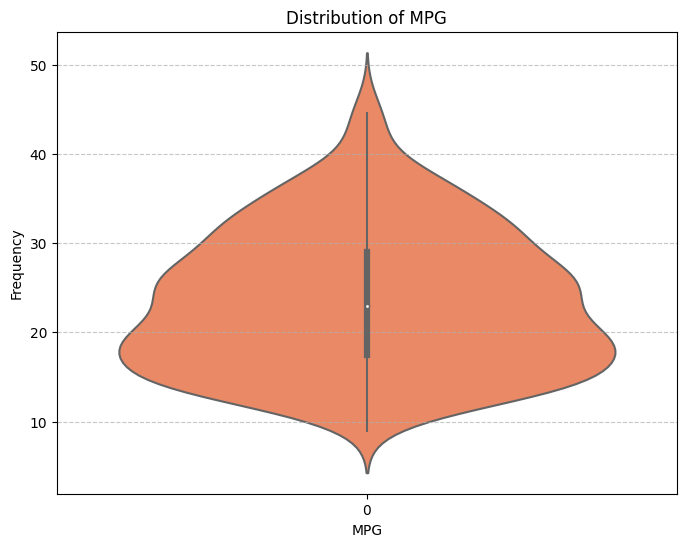

In [7]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data['mpg'], color='Coral')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> This chart provides a comprehensive view of the distribution of MPG values, highlighting the central tendency, variability, and common MPG values in the dataset, which is valuable for understanding the fuel efficiency of the automobiles in the dataset.

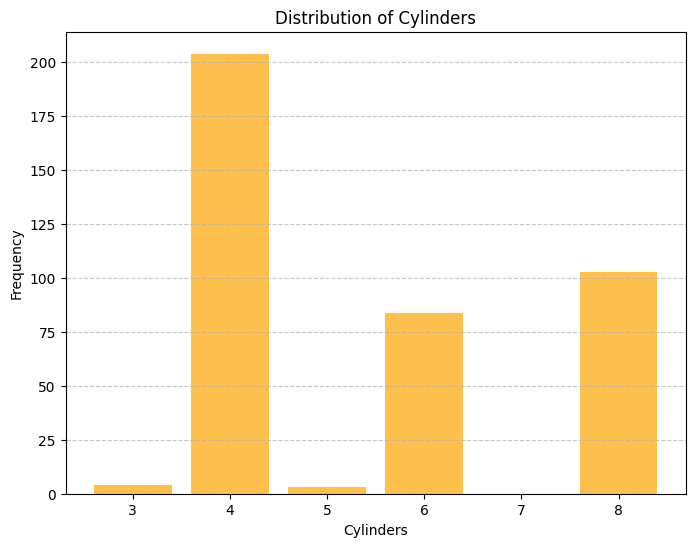

In [8]:
cylinder_counts = data['cylinders'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(cylinder_counts.index, cylinder_counts.values, color='orange', alpha=0.7)
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> The chart highlights the hierarchy of cylinder configurations based on their frequency within the dataset. It suggests that 4-cylinder engines are the most prevalent, followed by 8-cylinders, and then 6-cylinders. This information can be valuable for understanding the common engine types used in the automobiles represented in the dataset and is essential for various automotive and analytical purposes.

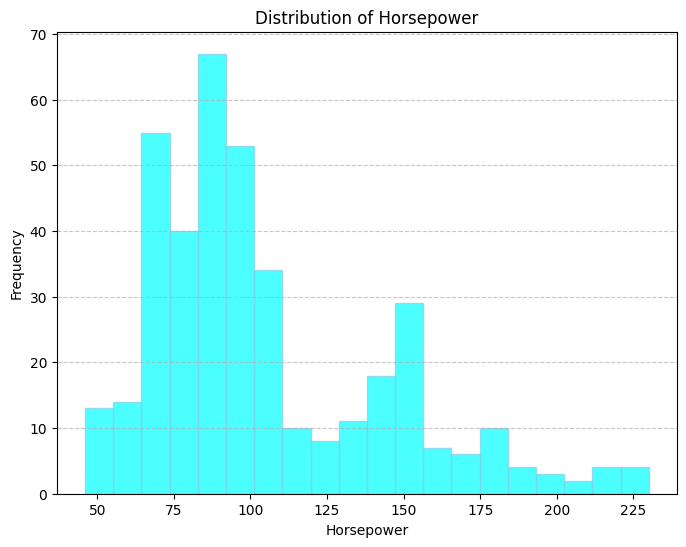

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(data['horsepower'], bins=20, color='aqua', edgecolor='skyblue', alpha=0.7)
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Distribution of Horsepower')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> Here, the histogram visually shows how horsepower values are distributed in the dataset. The peak between 60 to 110 horsepower, with frequencies of 70 to 35, reveals the most common range. This helps us quickly identify typical engine power characteristics in the dataset.

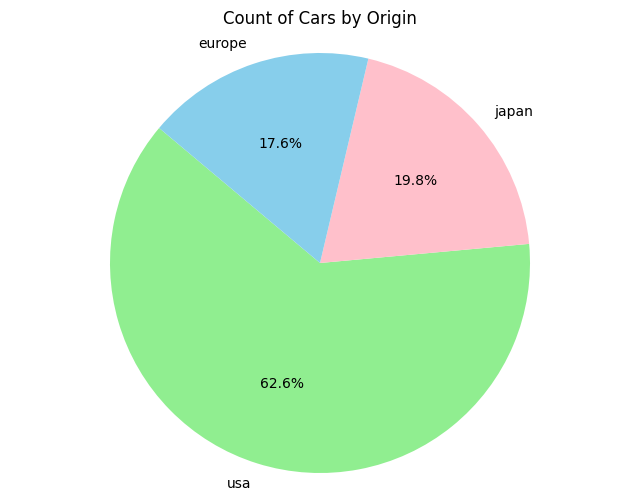

In [10]:
plt.figure(figsize=(8, 6))
counts = data['origin'].value_counts()
colors = ['lightgreen', 'pink', 'skyblue']
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Count of Cars by Origin')
plt.show()

> [[](http://)](http://)

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> The Pie Chart shows approximately 62.6%, were manufactured in the United States (USA). The largest portion of the pie chart represents cars from the USA. 19.8% of the cars in the dataset have their origin in Japan. The remaining segment of the pie chart, approximately 17.6%, represents cars that were manufactured in Europe.

[[](http://)](http://)

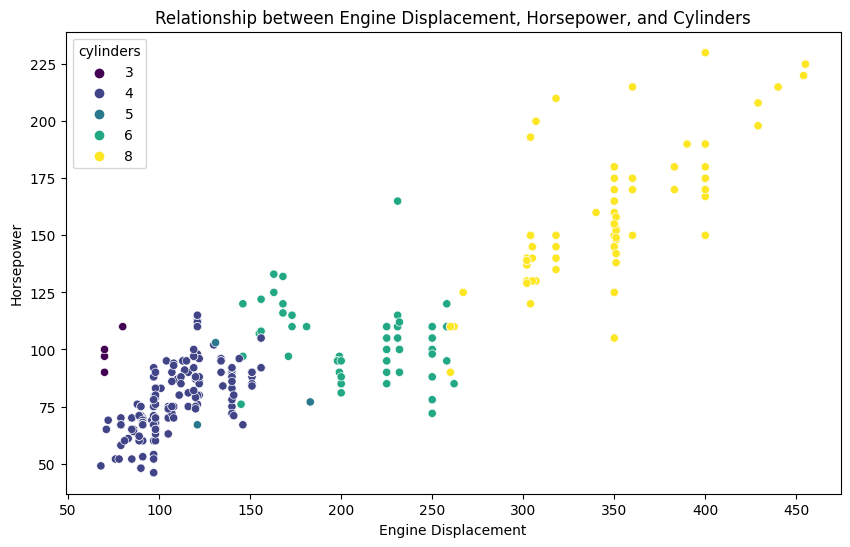

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='displacement', y='horsepower', hue='cylinders', palette='viridis')
plt.title('Relationship between Engine Displacement, Horsepower, and Cylinders')
plt.xlabel('Engine Displacement')
plt.ylabel('Horsepower')
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> The scatterplot uses different colors or markers to represent cars with a different number of cylinders, you can observe that cars with more cylinders tend to have both higher engine displacement and higher horsepower. In other words, there is a positive correlation between the number of cylinders and the engine's power characteristics.

In [12]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

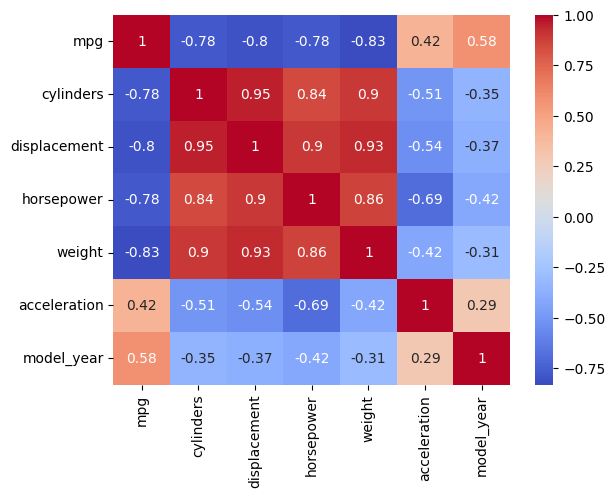

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;">   
    
**Positive Correlations:** Higher positive correlation values are observed between variables such as cylinders, displacement, horsepower, and weight. These positive correlations indicate a significant link between these variables, indicating that a gain in one variable is usually accompanied by an increase in the others. For instance, as the number of cylinders or displacement of the engine grows, so will the horsepower and weight of the vehicle. 

**Negative Correlation:** We see a negative relation between acceleration and variables like cylinders, displacement, horsepower, and weight. This negative association makes sense and corresponds to our perception. Smaller acceleration times suggest quicker automobiles, but higher values for factors like cylinders, displacement, horsepower, and weight indicate heavier or more powerful vehicles.

In [14]:
grouped = data.groupby("origin")

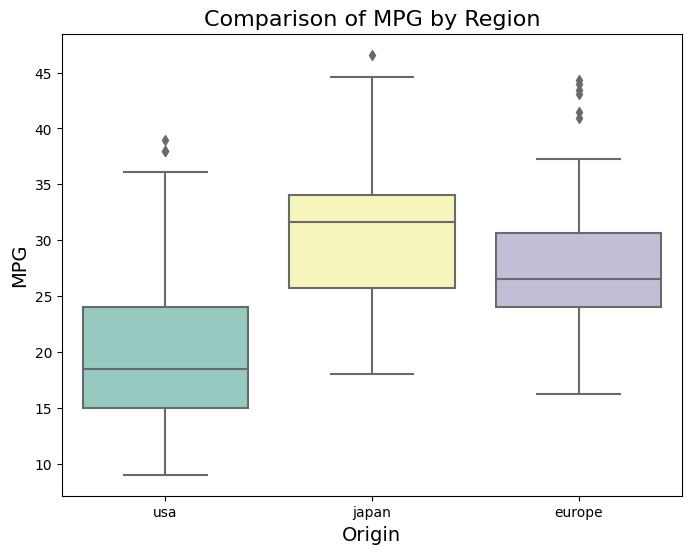

In [15]:
data = sns.load_dataset("mpg")

# Create a boxplot with different colors for each region
plt.figure(figsize=(8, 6))
sns.boxplot(x="origin", y="mpg", data=data, palette="Set3")

# Set titles and labels
plt.title("Comparison of MPG by Region", fontsize=16)
plt.xlabel("Origin", fontsize=14)
plt.ylabel("MPG", fontsize=14)

# Show the plot
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> This boxplot chart effectively compares the distribution of MPG values for cars from different regions, allowing you to make inferences about the fuel efficiency of cars from each region. The chart shows that cars from Europe and Japan generally have higher MPG, meaning they are more fuel-efficient on average, while cars from the USA have a wider range of MPG values, with some less fuel-efficient outliers.

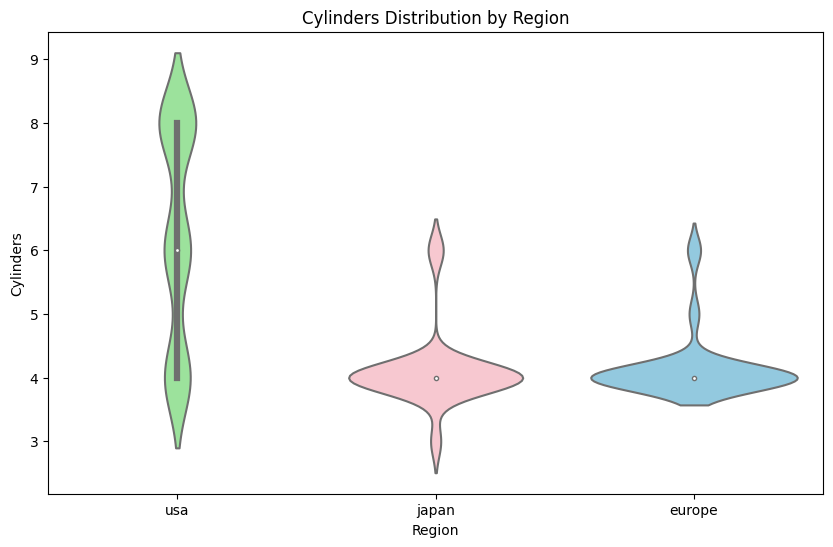

In [16]:
data = sns.load_dataset("mpg")

palette = sns.color_palette("Set2")

# Create a Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='origin', y='cylinders', data=data, palette=colors)
plt.title("Cylinders Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Cylinders")

# Show the Violin plot
plt.show()

<right>
<h1 style="background-color:lightgrey; color:Black; font-size:17px; font-family:Roman; border:1px solid black;"> This visualization helps us see how the number of cylinders, an essential factor in engine power, varies across cars originating from different regions. It also allows us to identify common cylinder counts associated with each region and understand how regional variations might affect engine design and performance.

<center>
<h1 style="background-color:Silver; color:black; font-size:40px; font-weight:bold; font-family:Times New Roman; border:1px solid black;">4. Key Insights</h1>
</center>

<right>
<h1 style="background-color:Brown; color:white; font-size:18px; font-family:Roman; border:1px solid black;">
    
1.  4-cylinder engines are most common, followed by 8-cylinders and 6-cylinders.
    
1.  The most common horsepower range is between 60 to 110 horsepower.
    
1.  The majority of cars in the dataset are from the USA (62.6%).
    
1.  Cars with more cylinders tend to have higher engine displacement and horsepower.
    
1. There are positive correlations between cylinders, displacement, horsepower, and weight.
    
1. Cars from Europe and Japan tend to have higher fuel efficiency (MPG) on average, while cars from the USA exhibit more variability in MPG.

# Key Insights

<center>
<h1 style="background-color:Silver; color:black; font-size:40px; font-weight:bold; font-family:Times New Roman; border:1px solid black;">5. Conclusion</h1>
</center>

<right>
<h1 style="background-color:Brown; color:white; font-size:18px; font-family:Roman; border:1px solid black;"> This project provides valuable insights into various aspects of automobiles. It reveals patterns in MPG, engine characteristics, and weight, and it highlights how these attributes vary based on the number of cylinders and the region of origin. These insights can be useful for both automotive enthusiasts and industry professionals in understanding the relationships between these variables and making informed decisions related to automobile design, manufacturing, and market strategies.

# Request for Feedback

Thank you for taking the time to review my notebook! I'd greatly appreciate your feedback on the following aspects:

**Data preprocessing:** Did I miss any critical steps?

**Correct Method:** Is the chosen analytical approach appropriate for this problem?

**Clarity:** Is my explanation clear and easy to follow?

Your insights will help me improve this analysis. Feel free to comment directly on the notebook or reach out to me. Thank you!